<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/ML_RN_heartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Materiais e Métodos

## Apresentar o DataSet.



https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/docs compartilhados /Trabalho Final/dados/2022/heart_2022_no_nans.csv')

print(dados.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [ ]:
dados

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
### Apresentar o dataset

#print(dados)

def descrever_df(df: pd.DataFrame):
    print(f"O conjunto de dados contém {df.shape[1]} atributos e {len(df)} linhas")

    for col in df.columns:
        tipo_coluna = df[col].dtype

        print(f"\nColuna: {col} ({tipo_coluna})")
        if tipo_coluna == 'object':
            print(f"--- Porcentagem de NaNs(Missing Values): {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Valores únicos:\n {df[col].unique()}")
        else:
            print(f"--- Estatísticas resumidas:\n {df[col].describe()}")

descrever_df(dados)

O conjunto de dados contém 40 atributos e 246022 linhas

Coluna: State (object)
--- Porcentagem de NaNs(Missing Values): 0.0
--- Valores únicos:
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Coluna: Sex (object)
--- Porcentagem de NaNs(Missing Values): 0.0
--- Valores únicos:
 ['Female' 'Male']

Coluna: GeneralHealth (object)
--- Porcentagem de NaNs(Missing Values): 0.0
--- Valores únicos:
 ['Very

In [ ]:
dados.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


## Exploração e Pre-processamento


In [ ]:
print(dados.columns)


Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


### Hipóteses

1.   Traçar o perfil mais frequente do individuo que sofre de Ataques do Coração em  relação ao gênero, categoria de idade e raça.
2.   Analisar a relação entre o aumento do IMC e a ocorrência de Ataques do Coração.
3. Analisar se existe relação entre o indivíduo ter diabetes e possuir chances maiores de ter um Ataque Cardíaco.  
4. Determinar se uma boa frequência de realização de exercícios físicos, no geral, implica na menor ocorrência de Ataques.
5. Observar se indivíduos que fumam apresentam maior propensão a ter um AVC.






*   O dataset não possui valores ausentes
*   Sobre a normalização e transformação dos dados:
    * Os dados categóricos foram convertidos em numéricos através do  Label Encoding e One-Hot Encoding (para atributos categóricos com mais de duas categorias)
    * Os dados são normalizados através do StandardScaler pois queremoss remover a influência de possíveis outliers



### Tratamento de Dados Ausentes


Verificar e lidar com valores ausentes, também conhecidos como NaNs (Not a Number), é uma etapa crucial do pré-processamento. Valores ausentes podem distorcer análises e modelos, levando a conclusões imprecisas ou enviesadas. Portanto, verificar a presença de valores ausentes e decidir como tratá-los é essencial para manter a qualidade dos dados e garantir que as análises subsequentes sejam confiáveis e precisas.

In [ ]:
# Verificar se existem valores ausentes
has_na = dados.isna().any().any()

if has_na:
    print("O DataFrame possui valores ausentes (NaN).")
else:
    print("O DataFrame não possui valores ausentes (NaN).")


O DataFrame não possui valores ausentes (NaN).


### Exploração Estatístitcas

In [ ]:
### Exploração

dados_hd = dados[dados['HadHeartAttack'] == 'Yes']

# Calcular a moda das colunas 'Sex', 'AgeCategory' e 'Race'
moda_sexo = dados_hd['Sex'].mode()[0]
moda_faixa_etaria = dados_hd['AgeCategory'].mode()[0]
moda_raca = dados_hd['RaceEthnicityCategory'].mode()[0]
moda_checkup = dados_hd['LastCheckupTime'].mode()[0]
moda_risco = dados_hd['HighRiskLastYear'].mode()[0]


# Imprimir as modas calculadas
print("Moda da coluna 'Sex' para casos de ataque cardíaco positivo:", moda_sexo)
print("Moda da coluna 'AgeCategory' para casos de ataque cardíaco positivo:", moda_faixa_etaria)
print("Moda da coluna 'RaceEthnicityCategory' para casos de ataque cardíaco positivo:", moda_raca)
print("Moda da coluna 'LastCheckupTime' para casos de ataque cardíaco positivo:", moda_checkup)
print("Moda da coluna ''HighRiskLastYear' para casos de ataque cardíaco positivo:", moda_risco)

Moda da coluna 'Sex' para casos de ataque cardíaco positivo: Male
Moda da coluna 'AgeCategory' para casos de ataque cardíaco positivo: Age 80 or older
Moda da coluna 'RaceEthnicityCategory' para casos de ataque cardíaco positivo: White only, Non-Hispanic
Moda da coluna 'LastCheckupTime' para casos de ataque cardíaco positivo: Within past year (anytime less than 12 months ago)
Moda da coluna ''HighRiskLastYear' para casos de ataque cardíaco positivo: No


In [ ]:
print(dados.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
#Analisar a relação entre o aumento do IMC e a ocorrência de Ataques do Coração.
#fazer teste de hipótese

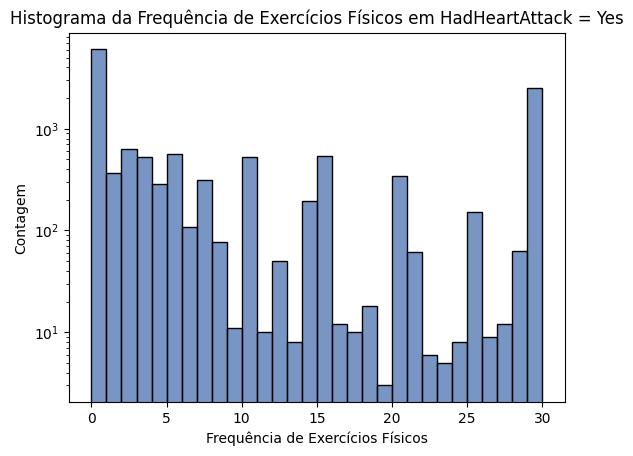

In [ ]:
### Hipótese - Determinar se uma boa frequência de realização de exercícios físicos, no geral, implica na menor ocorrência de Ataques.
# Definir a paleta de cores

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("deep")

#HadHeartAttack = Yes
dados_hd

# Criar o histograma
#sns.histplot(data=dados, x='PhysicalHealthDays', hue='HadHeartAttack', multiple="stack", bins=30)
sns.histplot(data=dados_hd['PhysicalHealthDays'], multiple="stack", bins=30)

# Adicionar um título e rótulos dos eixos
plt.title('Histograma da Frequência de Exercícios Físicos em HadHeartAttack = Yes')
plt.xlabel('Frequência de Exercícios Físicos')
plt.ylabel('Contagem')

plt.yscale('log')

# Mostrar o gráfico
plt.show()

In [ ]:
### Hipótse: Observar se indivíduos que fumam apresentam maior propensão a ter um AVC.

# Verificar se há algum "yes" na coluna "HadStroke"
if 'yes' in dados['HadStroke'].values:
    print("Sim, há pelo menos um 'yes' na coluna 'HadStroke'.")
else:
    print("Não, não há 'yes' na coluna 'HadStroke'.")


Não, não há 'yes' na coluna 'HadStroke'.


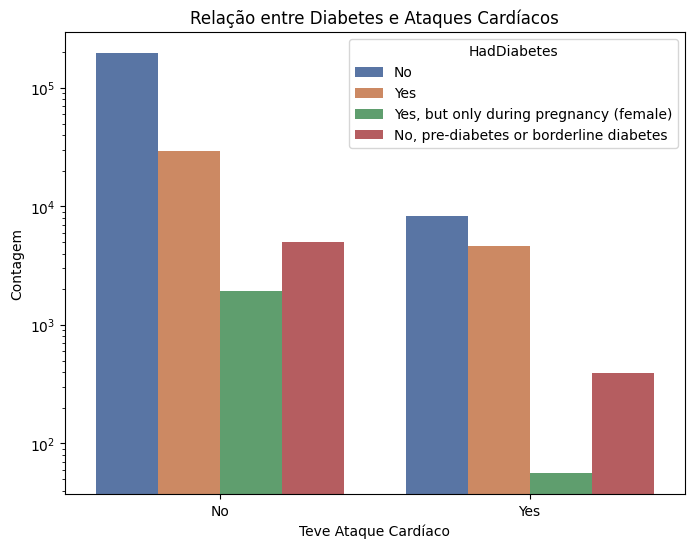

In [ ]:
### Hipóteses - Analisar se existe relação entre o indivíduo ter diabetes e possuir chances maiores de ter um Ataque Cardíaco

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='HadHeartAttack', hue='HadDiabetes')

# Adicionar título e rótulos dos eixos
plt.title('Relação entre Diabetes e Ataques Cardíacos')
plt.xlabel('Teve Ataque Cardíaco')
plt.ylabel('Contagem')
plt.yscale('log')

# Mostrar o gráfico
plt.show()


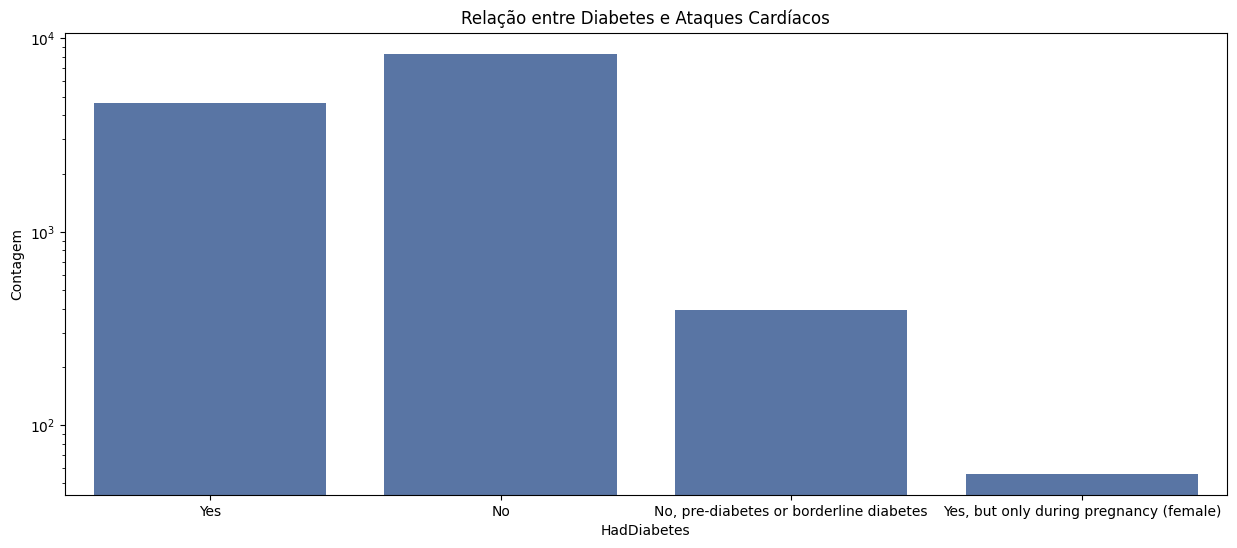

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(data=dados_hd, x='HadDiabetes')

# Adicionar título e rótulos dos eixos
plt.title('Relação entre Diabetes e Ataques Cardíacos')
plt.xlabel('HadDiabetes')
plt.ylabel('Contagem')
plt.yscale('log')

# Mostrar o gráfico
plt.show()

In [ ]:
from tabulate import tabulate

# Criar uma tabela de frequência cruzada
cross_tab = pd.crosstab(index=dados['HadDiabetes'], columns=dados['HadHeartAttack'])

table = tabulate(cross_tab, headers='keys', tablefmt='fancy_grid')

# Mostrar a tabela
print(table)


╒═════════════════════════════════════════╤════════╤═══════╕
│ HadDiabetes                             │     No │   Yes │
╞═════════════════════════════════════════╪════════╪═══════╡
│ No                                      │ 196501 │  8333 │
├─────────────────────────────────────────┼────────┼───────┤
│ No, pre-diabetes or borderline diabetes │   5000 │   392 │
├─────────────────────────────────────────┼────────┼───────┤
│ Yes                                     │  29159 │  4654 │
├─────────────────────────────────────────┼────────┼───────┤
│ Yes, but only during pregnancy (female) │   1927 │    56 │
╘═════════════════════════════════════════╧════════╧═══════╛


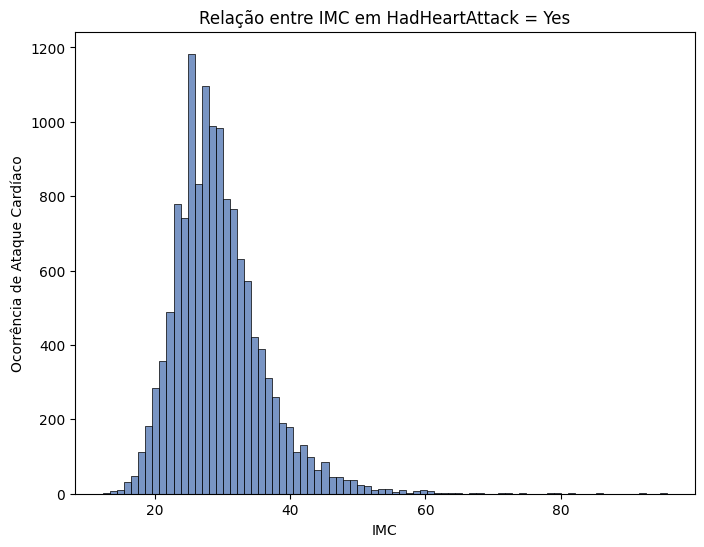

In [ ]:
### Hipótese - Analisar a relação entre o aumento do IMC e a ocorrência de Ataques do Coração.

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.histplot(data=dados_hd['BMI'], bins=80)
plt.xlabel('IMC')
plt.ylabel('Ocorrência de Ataque Cardíaco')
plt.title('Relação entre IMC em HadHeartAttack = Yes')
plt.show()

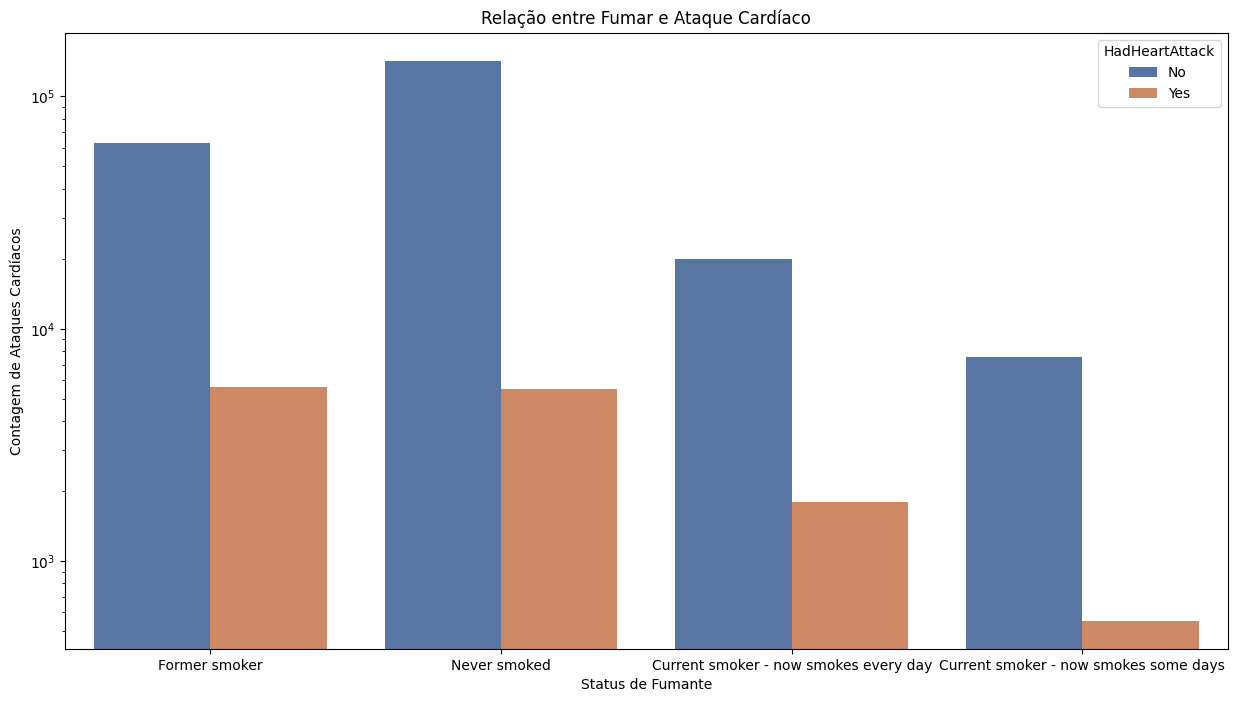

In [ ]:


# Criar um gráfico de barras
plt.figure(figsize=(15, 8))
sns.countplot(data=dados, x='SmokerStatus', hue='HadHeartAttack')

# Adicionar título e rótulos dos eixos
plt.title('Relação entre Fumar e Ataque Cardíaco')
plt.xlabel('Status de Fumante')
plt.ylabel('Contagem de Ataques Cardíacos')
plt.yscale('log')

# Mostrar o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 1600x800 with 0 Axes>

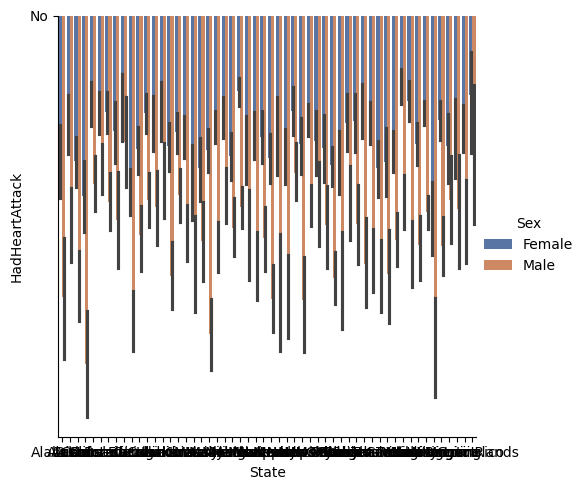

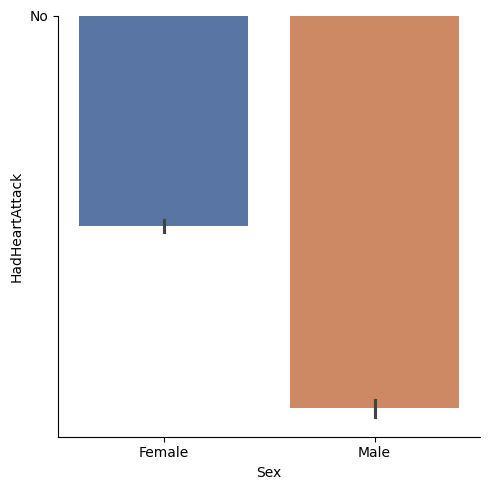

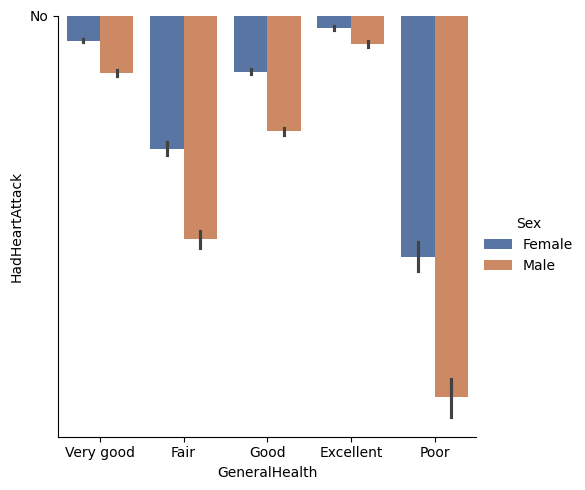

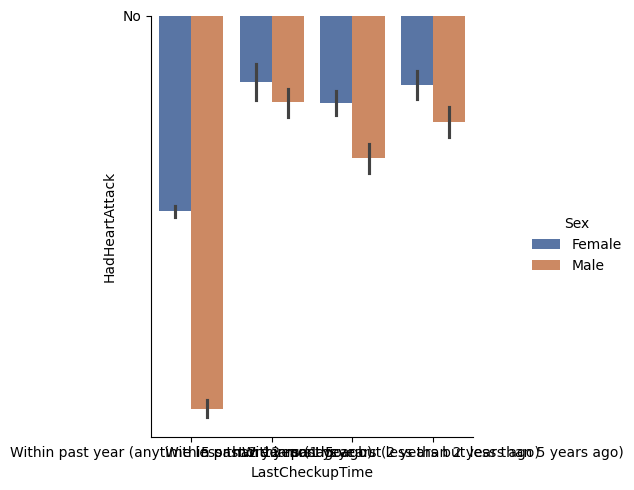

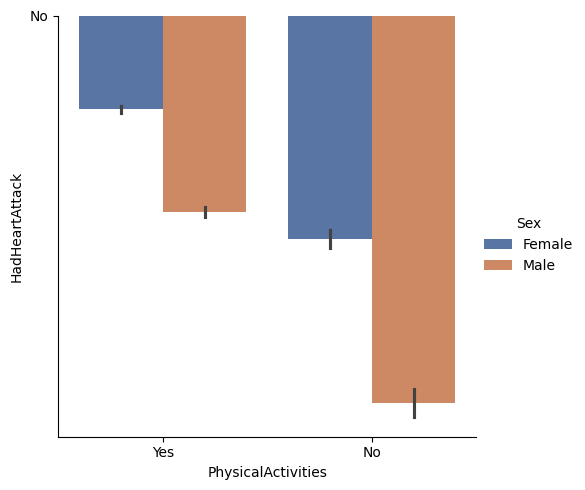

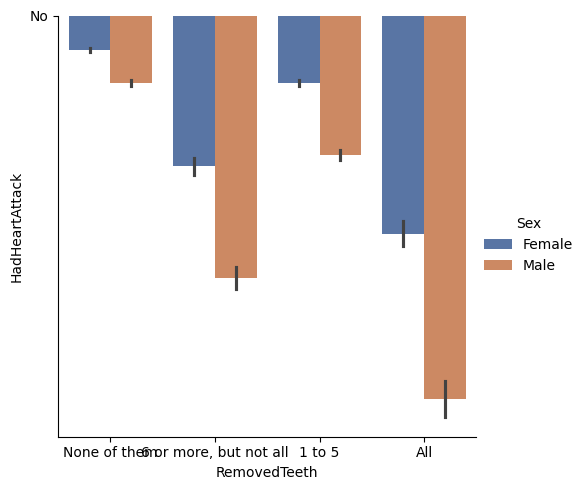

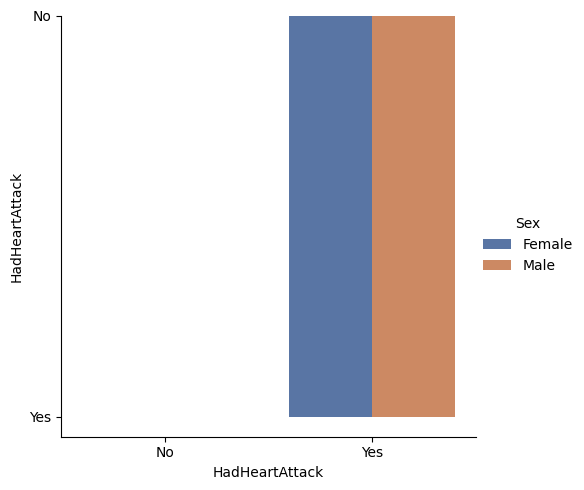

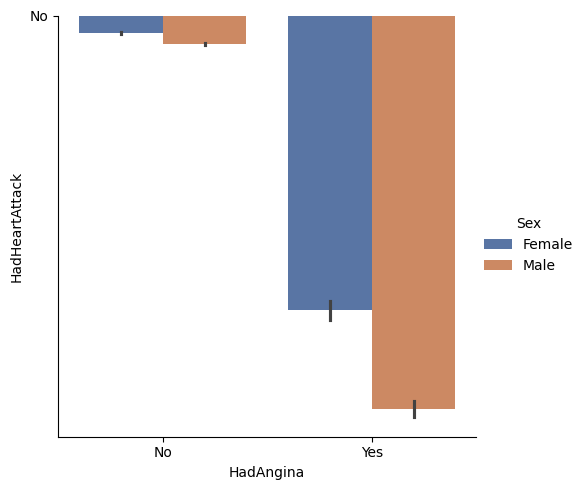

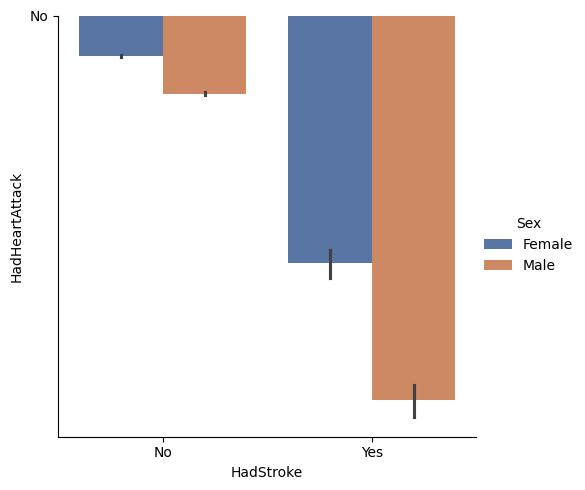

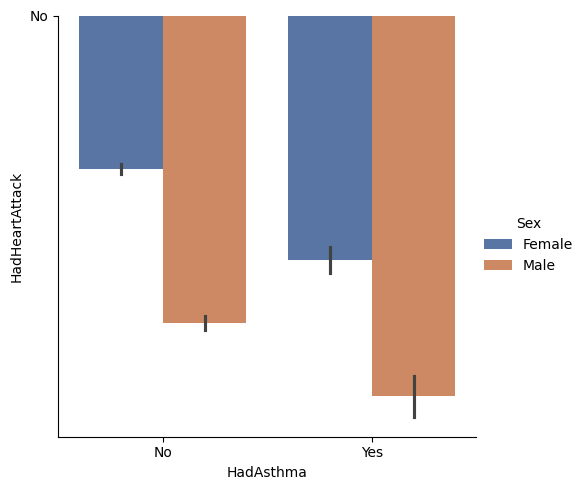

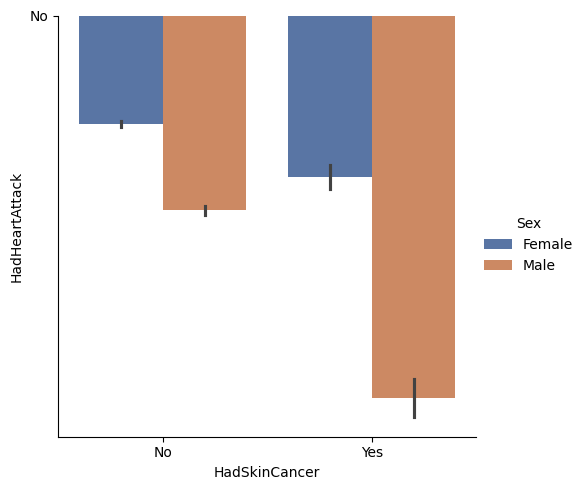

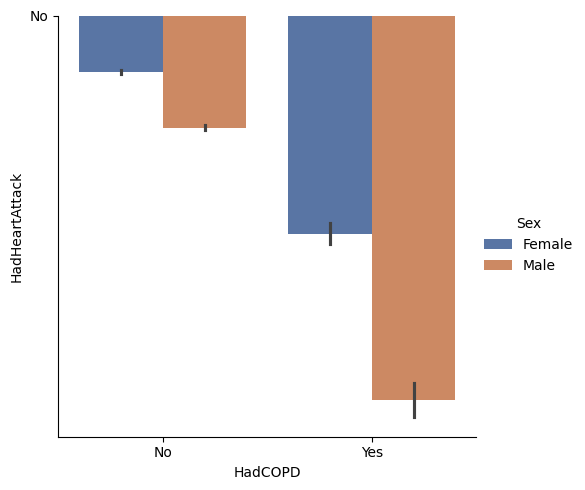

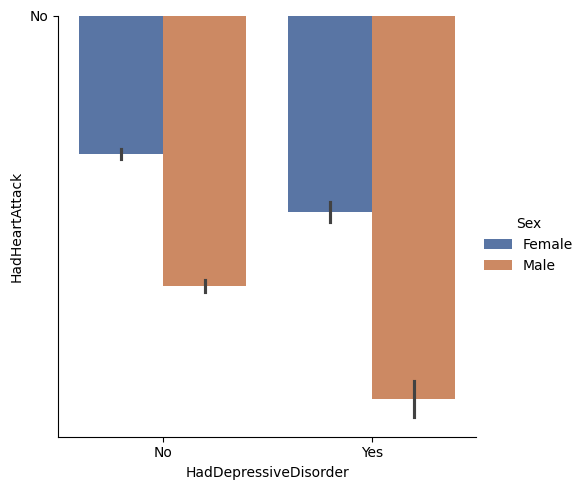

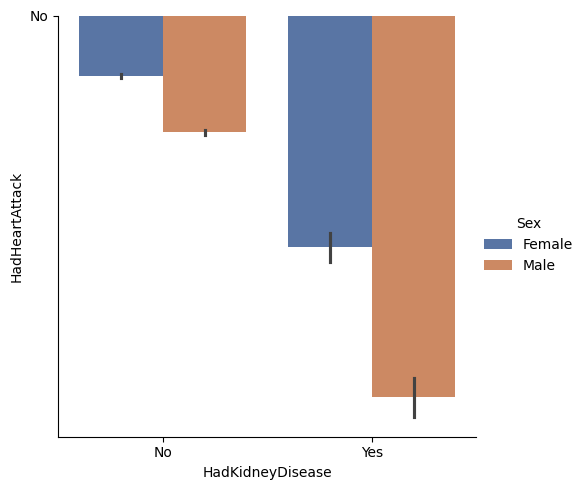

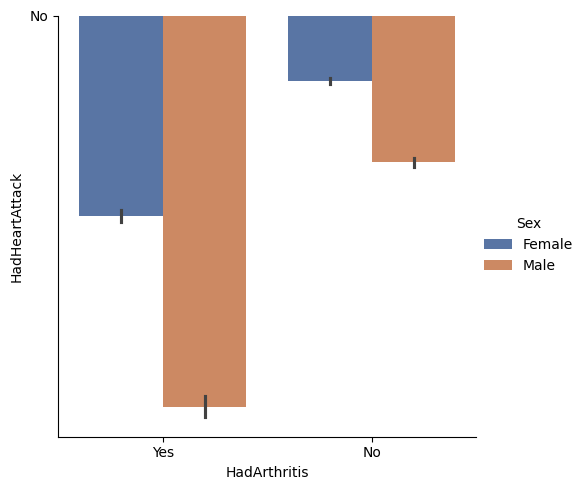

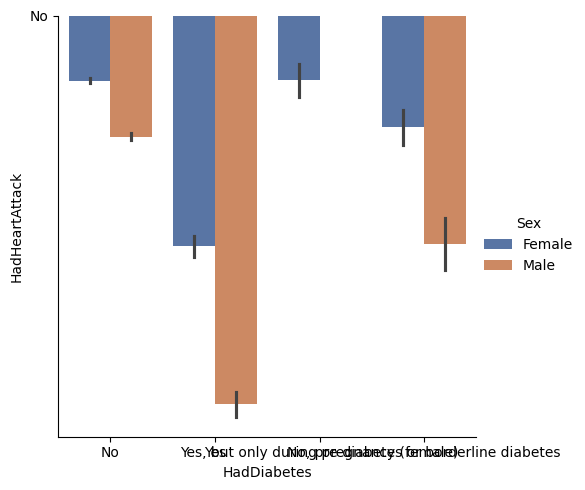

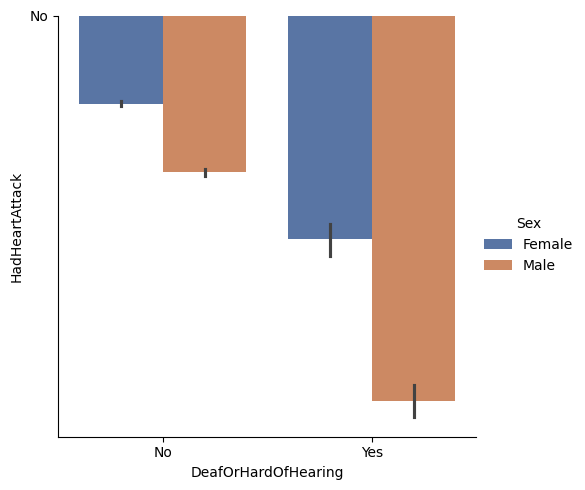

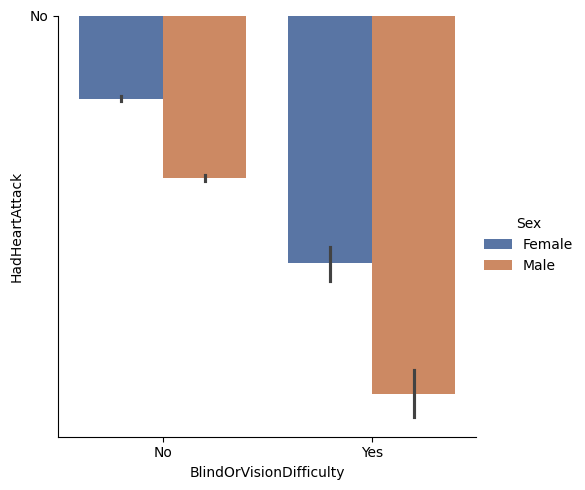

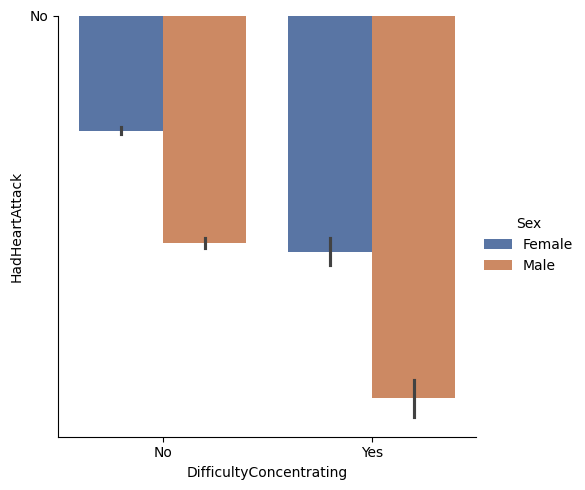

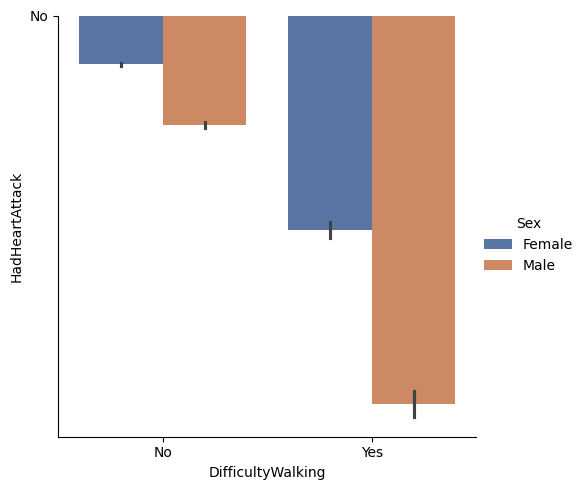

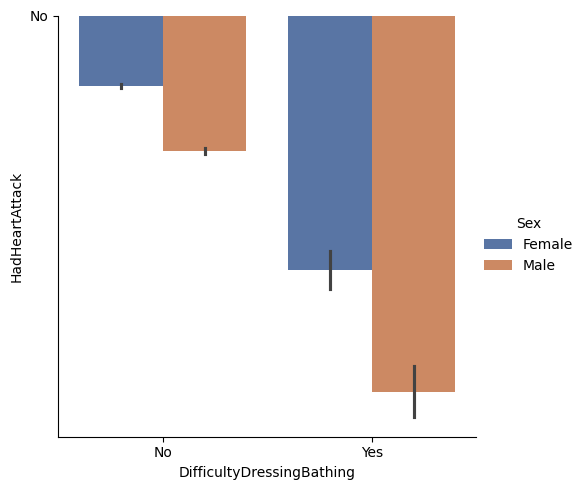

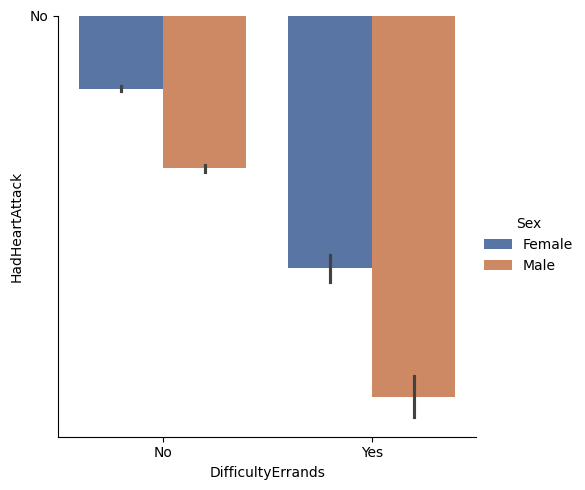

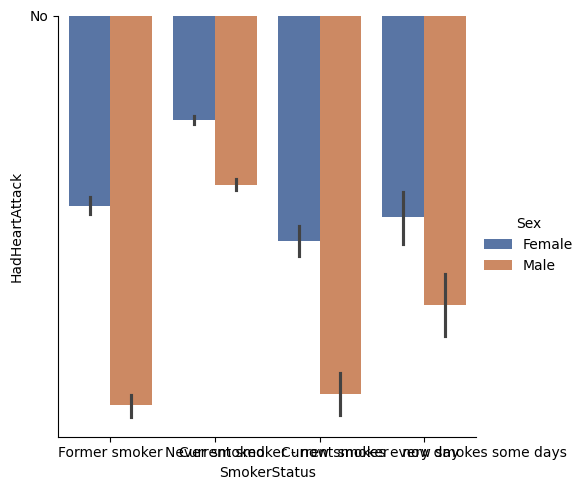

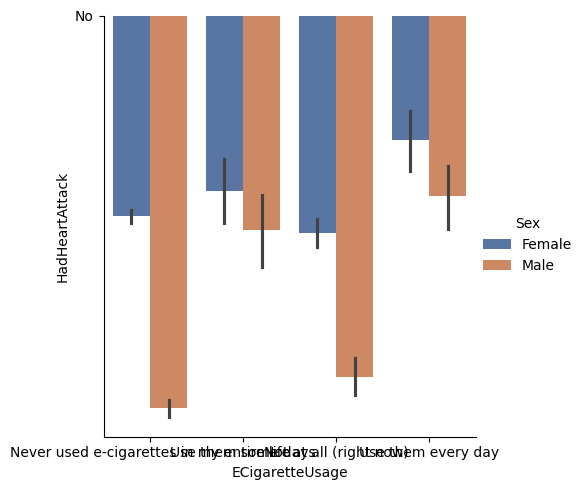

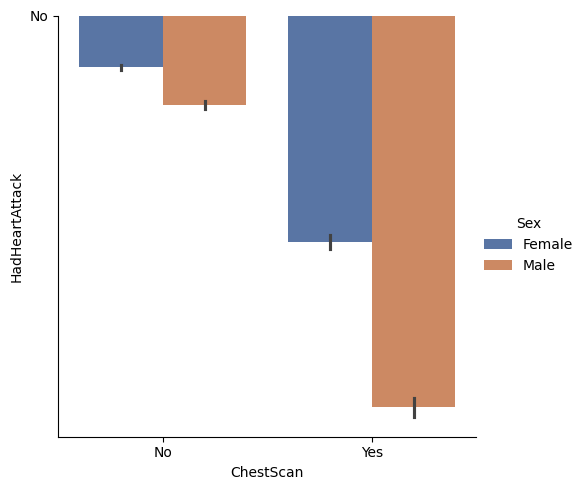

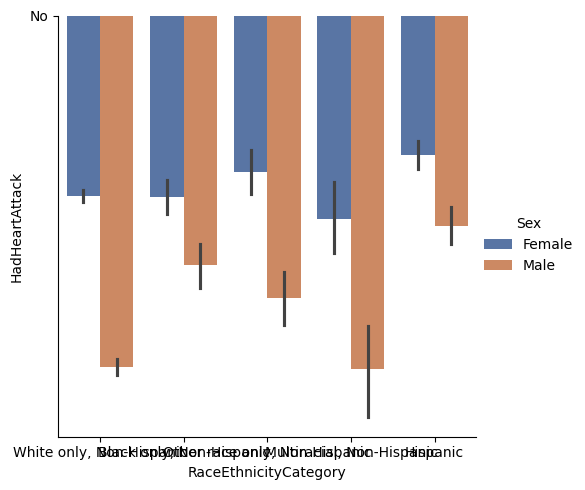

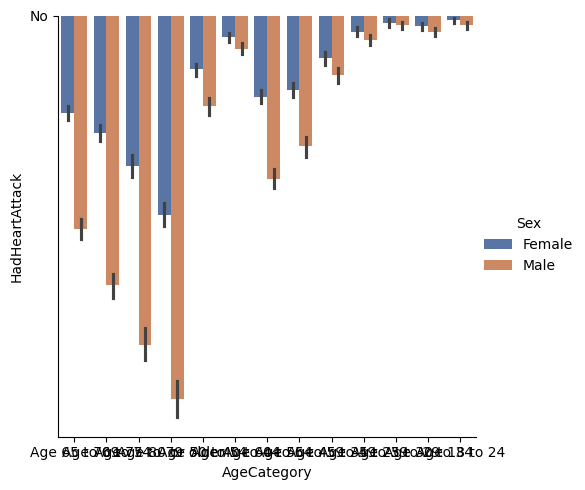

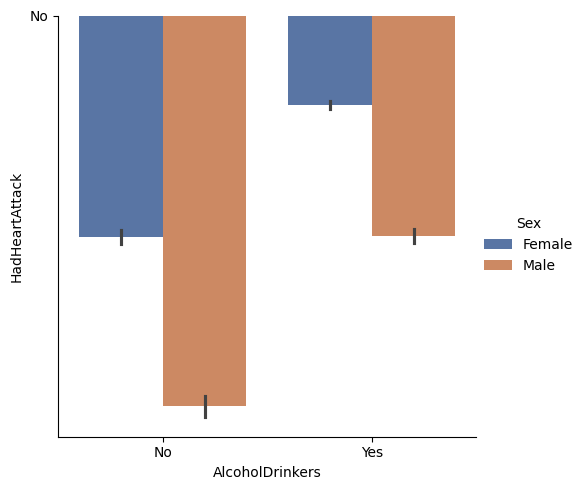

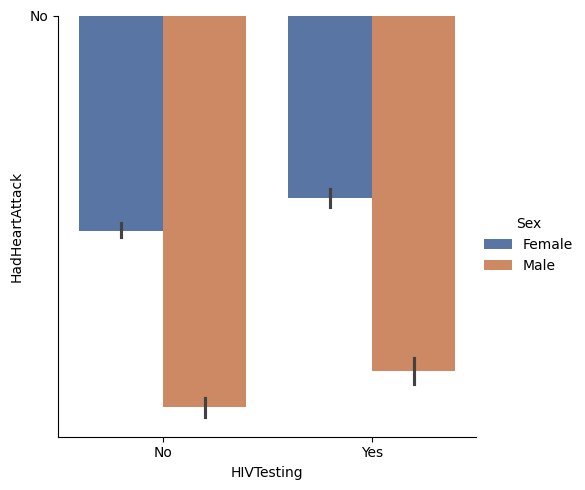

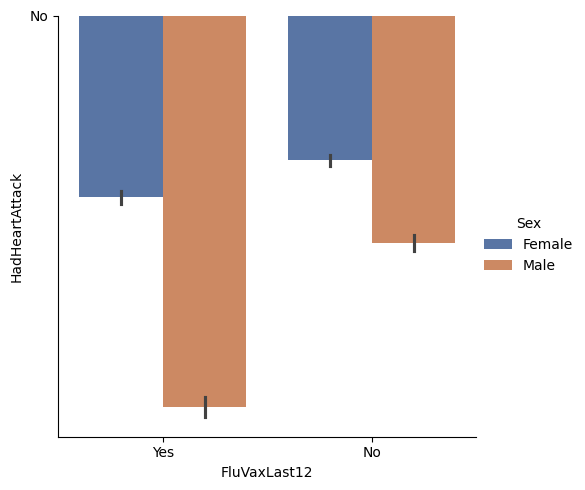

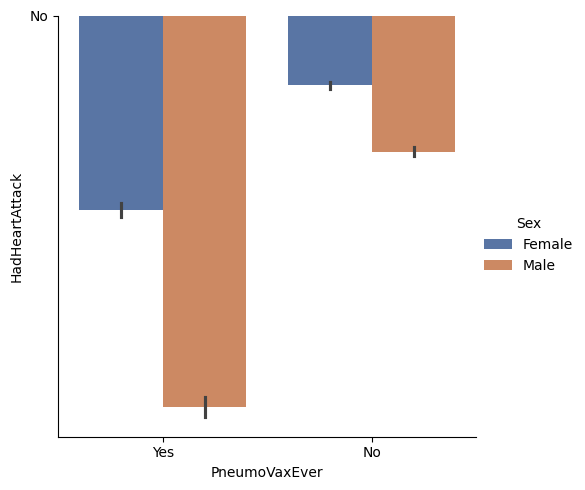

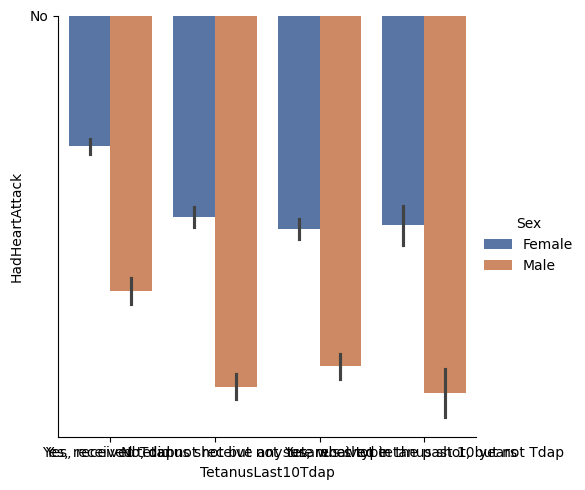

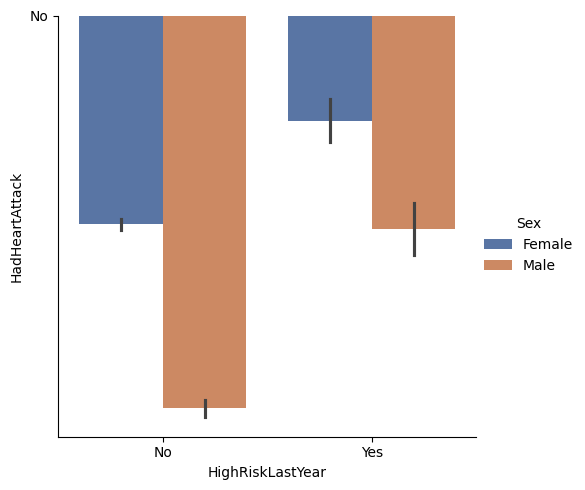

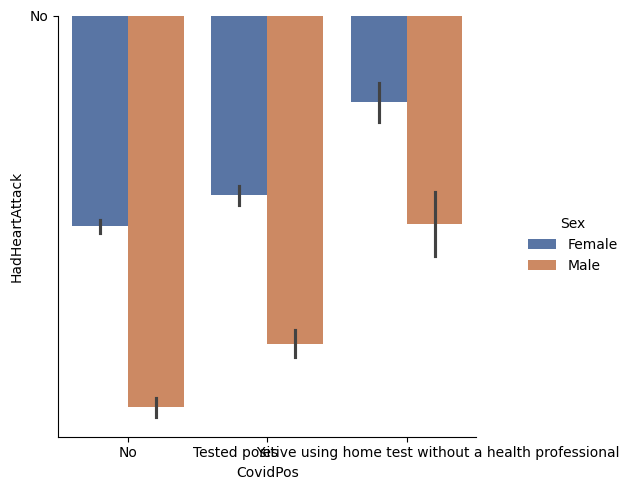

In [ ]:
dt_object = [col for col in dados.columns if dados[col].dtype == 'object']

plt.figure(figsize=(16, 8))
for i in dt_object:
    sns.catplot(y="HadHeartAttack", x=i, hue="Sex", data=dados, kind="bar")
plt.show()


### Conversão das características categóricas para numéricas e Eliminação da coluna State


*   Neste passo, as características categóricas são convertidas em formato numérico para que possam ser processadas por algoritmos de aprendizado de máquina.
* Isso é feito usando as técnicas de Label Encoding e One-Hot Encoding.
* O Label Encoding atribui um número inteiro único a cada categoria presente em uma coluna categórica, enquanto o One-Hot Encoding cria novas colunas binárias para cada categoria, indicando a presença ou ausência da categoria em cada entrada.



In [ ]:
heart_attack = dados['HadHeartAttack']
dados2 = dados.drop(columns=['HadHeartAttack','State'])

In [ ]:
#import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler


# Função para codificar características categóricas em numéricas



def encode_categorical_features(df):
    # Criar cópia do DataFrame original
    encoded_df = dados2.copy()

    # Loop sobre as colunas do DataFrame para identificar as características categóricas
    for column in encoded_df.columns:
        if encoded_df[column].dtype == 'object':  # Verifica se o tipo da feature é 'object' (categórica)
            # Aplica o LabelEncoder para converter as características categóricas em valores numéricos
            le = LabelEncoder()
            encoded_df[column] = le.fit_transform(encoded_df[column])

            # Aplica o OneHotEncoder apenas nas características categóricas com mais de 2 categorias
            if len(le.classes_) > 2:
                ohe = OneHotEncoder(handle_unknown='ignore')  # Ignora valores desconhecidos
                ohe_features = ohe.fit_transform(encoded_df[[column]])
                ohe_df = pd.DataFrame(ohe_features.toarray(), columns=[f"{column}_{cat}" for cat in le.classes_])
                encoded_df = pd.concat([encoded_df, ohe_df], axis=1)

    # Remove as colunas originais das características categóricas
    encoded_df.drop(columns=encoded_df.select_dtypes(include=['object']).columns, inplace=True)
    # Normaliza os valores numéricos
    scaler = StandardScaler()  # Você pode substituir por MinMaxScaler se preferir padronização. MinMaxScaler é melhor se a distribuição dos dados não
    # for normal e se o desejo for preservar a relação de ordem entre os valores
    encoded_df[encoded_df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(encoded_df[encoded_df.select_dtypes(include=['float64', 'int64']).columns])

    return encoded_df

# Chamar a função para codificar as características categóricas em numéricas
dados_transf = encode_categorical_features(dados2)
print("\n >>>> DataFrame com características categóricas codificadas em numéricas: \n")
#print(dados_encoded.head())
print(dados_transf.head())


 >>>> DataFrame com características categóricas codificadas em numéricas: 

        Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0 -0.961712       1.164703           -0.014160         -0.514292   
1  1.039813       1.164703           -0.490020         -0.514292   
2  1.039813       1.164703           -0.490020         -0.514292   
3 -0.961712      -0.870762            0.104805         -0.514292   
4 -0.961712      -0.192274           -0.133125          1.336949   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  HadAngina  \
0         0.454675            0.534726    1.373428      0.872317  -0.254386   
1         0.454675            0.534726   -0.708924      0.872317  -0.254386   
2         0.454675           -1.870115    0.679311     -0.608850  -0.254386   
3         0.454675            0.534726    1.373428      0.872317  -0.254386   
4         0.454675            0.534726   -1.403041     -1.349433  -0.254386   

   HadStroke  ...  AgeCategory_Age 70 t

In [ ]:
dados_transf

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,-0.961712,1.164703,-0.014160,-0.514292,0.454675,0.534726,1.373428,0.872317,-0.254386,-0.207036,...,-0.341826,-0.282106,-0.279410,-0.705424,1.581233,-0.656634,-0.296414,0.685924,-0.187924,-0.632657
1,1.039813,1.164703,-0.490020,-0.514292,0.454675,0.534726,-0.708924,0.872317,-0.254386,-0.207036,...,2.925463,-0.282106,-0.279410,-0.705424,-0.632418,1.522920,-0.296414,0.685924,-0.187924,-0.632657
2,1.039813,1.164703,-0.490020,-0.514292,0.454675,-1.870115,0.679311,-0.608850,-0.254386,-0.207036,...,-0.341826,3.544770,-0.279410,1.417587,-0.632418,-0.656634,-0.296414,-1.457888,-0.187924,1.580635
3,-0.961712,-0.870762,0.104805,-0.514292,0.454675,0.534726,1.373428,0.872317,-0.254386,-0.207036,...,-0.341826,-0.282106,3.578973,1.417587,-0.632418,-0.656634,-0.296414,-1.457888,-0.187924,1.580635
4,-0.961712,-0.192274,-0.133125,1.336949,0.454675,0.534726,-1.403041,-1.349433,-0.254386,-0.207036,...,-0.341826,-0.282106,3.578973,1.417587,-0.632418,-0.656634,-0.296414,0.685924,-0.187924,-0.632657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1.039813,1.164703,-0.490020,-0.514292,-1.953716,0.534726,-0.708924,0.872317,-0.254386,-0.207036,...,-0.341826,-0.282106,-0.279410,-0.705424,-0.632418,1.522920,-0.296414,0.685924,-0.187924,-0.632657
246018,-0.961712,-0.870762,-0.490020,0.349621,0.454675,0.534726,-0.014807,0.872317,-0.254386,-0.207036,...,-0.341826,-0.282106,-0.279410,1.417587,-0.632418,-0.656634,-0.296414,-1.457888,-0.187924,1.580635
246019,1.039813,-0.192274,-0.490020,1.336949,0.454675,0.534726,-0.014807,-1.349433,-0.254386,4.830084,...,-0.341826,-0.282106,-0.279410,-0.705424,-0.632418,1.522920,-0.296414,-1.457888,-0.187924,1.580635
246020,-0.961712,-1.549251,-0.252090,-0.267460,0.454675,0.534726,-0.014807,0.872317,-0.254386,-0.207036,...,-0.341826,-0.282106,-0.279410,-0.705424,-0.632418,1.522920,-0.296414,0.685924,-0.187924,-0.632657


In [ ]:
# Passo 3: Transformar os valores 'Yes' em 1 e 'No' em 0 na coluna 'HadHeartAttack'
heart_attack.replace({'Yes': 1, 'No': 0}, inplace=True)

# Passo 4: Juntar novamente os dois conjuntos de dados
dados_encoded = pd.concat([dados_transf, heart_attack], axis=1)


#descrever_df(dados_encoded)

# Extração de Features





### Heatmap e PCA

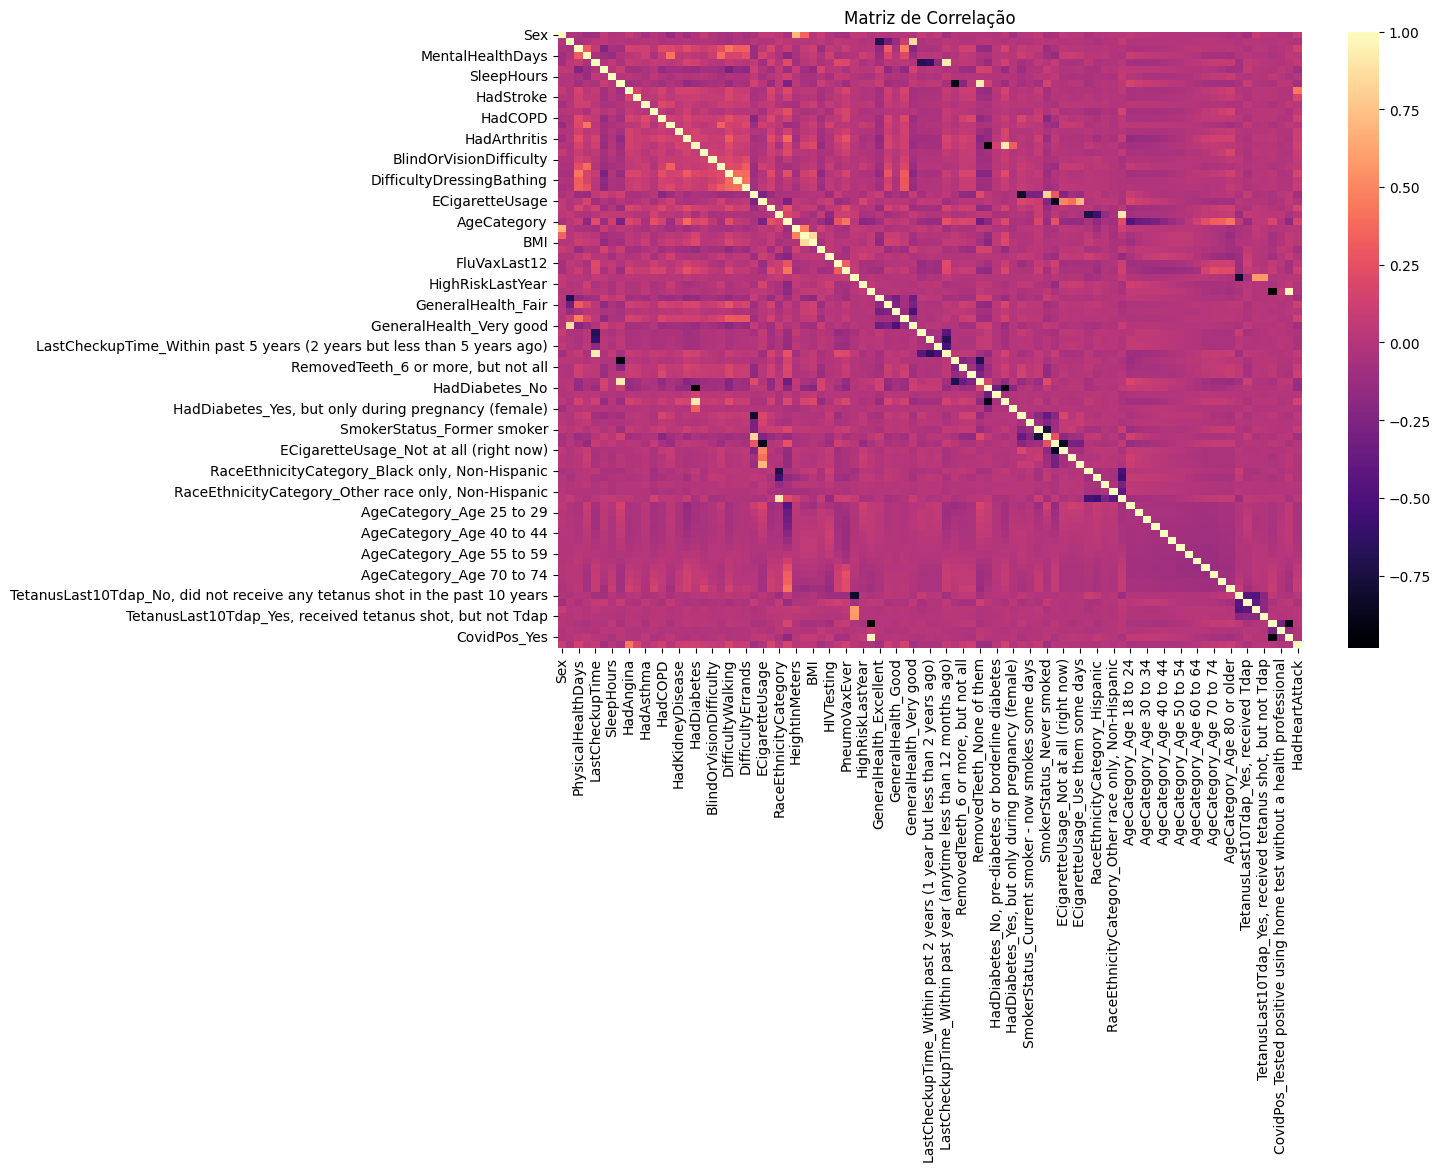

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Função para calcular a matriz de correlação e plotar o heatmap
def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='magma', fmt=".2f")
    plt.title("Matriz de Correlação")
    plt.show()

# Plotar a matriz de correlação
plot_correlation_heatmap(dados_encoded)

In [ ]:
def select_features_with_pca(df, threshold=0.9): #selecionando atributos que explicam pelo menos 90% da variância total dos dados
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = explained_variance_ratio.cumsum()
    selected_features = df.columns[cumulative_variance_ratio <= threshold]
    return selected_features

# Selecionar os atributos usando PCA
selected_features = select_features_with_pca(dados_encoded.drop(columns=['HadHeartAttack']))  # Excluindo a cocluna target
print("Atributos selecionados com PCA:")
print(selected_features)
print(len(selected_features))

Atributos selecionados com PCA:
Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'GeneralHealth_Excellent',
       'GeneralHealth_Fair', 'GeneralHealth_Good', 'GeneralHealth_Poor',
       'GeneralHealth_Very good', 'LastCheckupTime_5 or more years ago',
       'LastCheckupTime_Within past 2

###Pré Processamento


* Separação de Features e Alvo:
    O código separa as características (features) do conjunto de dados (x) e a variável alvo (y). Neste caso, presume-se que a variável alvo seja a coluna "HeartDisease". As características são todas as colunas, exceto a "HeartDisease", que representa o diagnóstico de doença cardíaca.
* Separação dos Dados em Conjuntos de Treinamento e Teste:
    Utilizamos a função train_test_split da biblioteca sklearn.model_selection para dividir os dados em conjuntos de treinamento e teste. Aqui, os dados são divididos em 80% para treinamento e 20% para teste, com uma semente aleatória (random_state=0) para garantir reproducibilidade.
* Pré-processamento dos Dados:
    Uma função de pré-processamento chamada preprocess é definida para realizar várias etapas de pré-processamento nos dados de treinamento e teste.
* Redução de Dimensionalidade com PCA:
    A função reduzir_dimensionalidade é definida para padronizar os dados e, em seguida, aplicar a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade, mantendo 90% da variância dos dados originais. Isso ajuda a reduzir a complexidade do modelo e o tempo de treinamento.
* Remoção de Outliers:
    A função remover_outliers é definida para remover outliers dos dados. Aqui, os outliers são identificados como aqueles abaixo do 10º percentil e acima do 90º percentil. Essa etapa ajuda a melhorar a robustez do modelo, removendo valores extremos que podem afetar negativamente o desempenho do algoritmo.
* Balanceamento de Classes:
    Verificamos o quão desbalanceadas estão as classes da variável alvo antes do balanceamento, usando a função verificar_balanceamento_classe. Em seguida, aplicamos o balanceamento de classes usando a técnica de oversampling com a classe RandomOverSampler da biblioteca imblearn.over_sampling, garantindo que as classes estejam equilibradas para evitar viés durante o treinamento do modelo.
* Chamada da Função de Pré-processamento:
    Finalmente, chamamos a função preprocess para realizar o pré-processamento nos dados de treinamento e teste, obtendo os conjuntos de dados pré-processados x_treino_novo, x_teste_novo, y_treino_novo e y_teste_novo. Estes serão usados posteriormente para treinar e testar os modelos de classificação.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Separar features (x) e alvo (y)
x = dados_encoded.drop(columns=['HadHeartAttack'])  # assumindo que 'HadHeartAttack' é a coluna-alvo
y = dados_encoded['HadHeartAttack']

# Separar os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=0)

# Completando a função pré-processamento
def preprocess(x_treino, x_teste, y_treino, y_teste):

    # Redução de dimensionalidade mantendo 90% da variância
    def reduzir_dimensionalidade(x):
        # Padronizar os dados - normalização
        scaler = StandardScaler()
        x_padronizado = scaler.fit_transform(x)

        # Aplicar PCA
        pca = PCA(n_components=0.9)  # Manter 90% da variância
        x_reduzido = pca.fit_transform(x_padronizado)

        return x_reduzido

    # Reduzir a dimensionalidade dos conjuntos de treinamento e teste
    x_treino_reduzido = reduzir_dimensionalidade(x_treino)
    x_teste_reduzido = reduzir_dimensionalidade(x_teste)

    # Remoção de outliers abaixo do p10 e acima do p90
    def remover_outliers(x):
        q10 = np.percentile(x, 10, axis=0)
        q90 = np.percentile(x, 90, axis=0)
        x_sem_outliers = x[(x >= q10) & (x <= q90)]
        return x_sem_outliers

    # Aplicar remoção de outliers aos conjuntos de treinamento e teste
    x_treino_sem_outliers = remover_outliers(x_treino)
    x_teste_sem_outliers = remover_outliers(x_teste)

    # Verificar o quão desbalanceadas estão as classes antes do balanceamento
    def verificar_balanceamento_classe(y):
        classes_balanceadas_antes = np.bincount(y) / len(y)
        return classes_balanceadas_antes

    # Balanceamento de classes
    ros = RandomOverSampler(random_state=42)
    x_treino_resampled, y_treino_resampled = ros.fit_resample(x_treino, y_treino)

    return x_treino_resampled, x_teste, y_treino_resampled, y_teste

# Chamar a função preprocess para pré-processar os dados
x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo = preprocess(x_treino, x_teste, y_treino, y_teste)


### Métricas para avaliar o modelo

In [ ]:
## Matriz de confusão
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred)
    return conf

In [ ]:
def accuracy(y_true, y_pred):
  # Calcula a matriz de confusão
  conf_mat = confusion_matrix(y_true, y_pred)
  #print(conf_mat)
  if conf_mat.shape[0] > 1:
    VP = conf_mat[1, 1]
    VN = conf_mat[0, 0]
    FN = conf_mat[1, 0]
    FP = conf_mat[0, 1]
    total = VP + VN + FP + FN
    if total == 0:
      return 0
    return (VP+VN)/(total)
  else:
    if y_true == y_pred:
      return 1
    else:
      return 0
#acc = accuracy(conf_mat)

#print("A Acurácia é", acc )

In [ ]:
# A precisão calcula a porcentagem de exemplos classificados como positivos que são realmente positivos
def precisao(y_true,y_pred):
    # Calcula a matriz de confusão
    conf_mat = confusion_matrix(y_true, y_pred)
    if conf_mat.shape[0] > 1:
      VP = conf_mat[1, 1]
#    print(VP)
      FP = conf_mat[0, 1]
      if VP + FP == 0:
          return 0
      return VP / (VP + FP)
    else:
      if y_true == y_pred:
        return 1
      else:
        return 0
#prec = precisao(conf_mat)
#print("A Precisão é igual a", prec)

In [ ]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 2.

def recall(y_true,y_pred):
    # Calcula a matriz de confusão
    conf_mat = confusion_matrix(y_true, y_pred)
    if conf_mat.shape[0] > 1:
      VP = conf_mat[1, 1]
      FN = conf_mat[1, 0]
      if VP + FN == 0:
          return 0
      return VP / (VP + FN)
    else:
      if y_true == y_pred:
        return 1
      else:
        return 0
#rec = recall(conf_mat)

#print("O Recall é igual a", rec )

In [ ]:
def f1_score(y_true, y_pred):
    # Calcula a precisão e o recall usando as funções já definidas
    precision = precisao(y_true, y_pred)
    recall_score = recall(y_true, y_pred)  # Renomeia a variável para evitar conflito de nomes
    # Calcula o F1 Score usando as fórmulas correspondentes
    f1 = 2 * (precision * recall_score) / (precision + recall_score) if precision + recall_score != 0 else 0
    return f1

# Exemplo de uso:
# f1 = f1_score(y_true, y_pred)
# print("O F1 Score é igual a", f1)



## Modelos de Classificação ou Regressão

- (Perceptron, DT): descrever sobre os modelos utilizados. Basta no mínimo dois modelos e pode ser aqueles dois utilizados no Exercicio 4: Dt e KNN, considerando algumas variações de parâmetros.

- Ex: k=5, k=10 ...



*  KNN (K-Nearest Neighbors):
Método simples de aprendizado supervisionado. Classifica um novo ponto de dados com base na maioria dos vizinhos mais próximos.
Não requer treinamento explícito, apenas armazena os dados de treinamento.
Sensível à escala dos dados e ao número de vizinhos escolhidos.

* Árvore de Decisão:
Representa uma estrutura hierárquica de decisões.
Divide o espaço de características em regiões retangulares.
Cada nó representa uma decisão baseada em um atributo.
Pode lidar com dados categóricos e numéricos.
Propenso ao overfitting em conjuntos de dados complexos.

* Perceptron:
Modelo de classificação linear.
Usa uma função de ativação para determinar a saída.
Pode ser usado para classificação binária.
Treina usando o algoritmo de aprendizado de gradiente descendente.

* Random Forest:
Ensemble de árvores de decisão.
Treina várias árvores em subconjuntos aleatórios dos dados.
Combina as previsões de várias árvores para uma previsão final.
Reduz o overfitting em comparação com uma única árvore de decisão.
Pode lidar com dados faltantes e muitos tipos de dados.

* SVM (Support Vector Machine):
Método de aprendizado supervisionado para classificação e regressão.
Encontra o hiperplano que melhor separa os pontos de dados das diferentes classes.
Pode lidar com dados lineares e não lineares usando diferentes funções de kernel.
Eficiente em espaços de alta dimensão.
Sensível à escolha do kernel e aos parâmetros de regularização.




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix

def classificacao(data, columns, target, preproc_fn, score_fn, score_name,
                  folds='loo', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 5 modelos (KNN, Árvore de Decisão, Perceptron, Random Forest, SVM)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    # Inicialização dos classificadores
    knn = KNeighborsClassifier(n_neighbors=10)
    dt = DecisionTreeClassifier(criterion='log_loss', splitter='best', min_samples_split=int(len(data) * 0.1))
    perceptron = Perceptron(penalty='elasticnet')
    rf = RandomForestClassifier(n_estimators=300)
    svm = SVC(kernel='poly')

    clfs = [knn, dt, perceptron, rf, svm]
    clfs_names = ['knn', 'dt', 'perceptron', 'rf', 'svm']

    # Preparação da validação cruzada
    if folds == 'loo':  # Leave-One-Out
        kf = LeaveOneOut()
    else:  # K-Fold
        kf = KFold(n_splits=folds)

    # Dicionário para armazenar os resultados da classificação
    results = {'knn': [], 'dt': [], 'perceptron': [], 'rf': [], 'svm': []}

    # Loop sobre os classificadores
    for c, c_name in zip(clfs, clfs_names):
        # Loop sobre os folds da validação cruzada
        for train_index, test_index in kf.split(data):
            # Separação dos conjuntos de treino e teste
            x_train, x_test = data.iloc[train_index, columns], data.iloc[test_index, columns]
            y_train, y_test = target[train_index], target[test_index]

            # Pré-processamento dos dados
            x_train, x_test, y_train, y_test = preproc_fn(x_train, x_test, y_train, y_test)

            # Treinamento do modelo
            clf = c.fit(X=x_train, y=y_train)

            # Predição nos dados de teste
            y_pred = clf.predict(x_test)

            # Cálculo da medida de desempenho e armazenamento dos resultados
            resultado = score_fn(y_test, y_pred)
            results[c_name].append(resultado)

    # Plot dos resultados de desempenho
    if not plot:
        return {'results': results, 'clfs': clfs}
    else:
        plt.figure(figsize=(8, 10))
        bars = plt.bar(range(1, len(clfs) + 1), [mean(results[name]) for name in clfs_names],
                       yerr=[std(results[name]) for name in clfs_names])
        plt.xticks(range(1, len(clfs) + 1), clfs_names, rotation=45)
        title = 'Desempenho dos classificadores - %s' % (score_name)
        plt.title(title)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), va='bottom')
        plt.show()

        return {'results': results, 'clfs': clfs}



In [ ]:
## Reduzindo o tamanho do dataset - é muito grande, não estamos conseguindo rodar o modelo
print(dados_encoded.shape)

dados_encoded_reduzido = dados_encoded.sample(n=10000, random_state=0)

print(dados_encoded_reduzido.shape)

(246022, 89)
(10000, 89)


In [ ]:
# Redefinir o índice do DataFrame 'dados_encoded_reduzido['HadHeartAttack']'
dados_encoded_reduzido['HadHeartAttack'].reset_index(drop=True, inplace=True)
print(dados_encoded_reduzido.head())

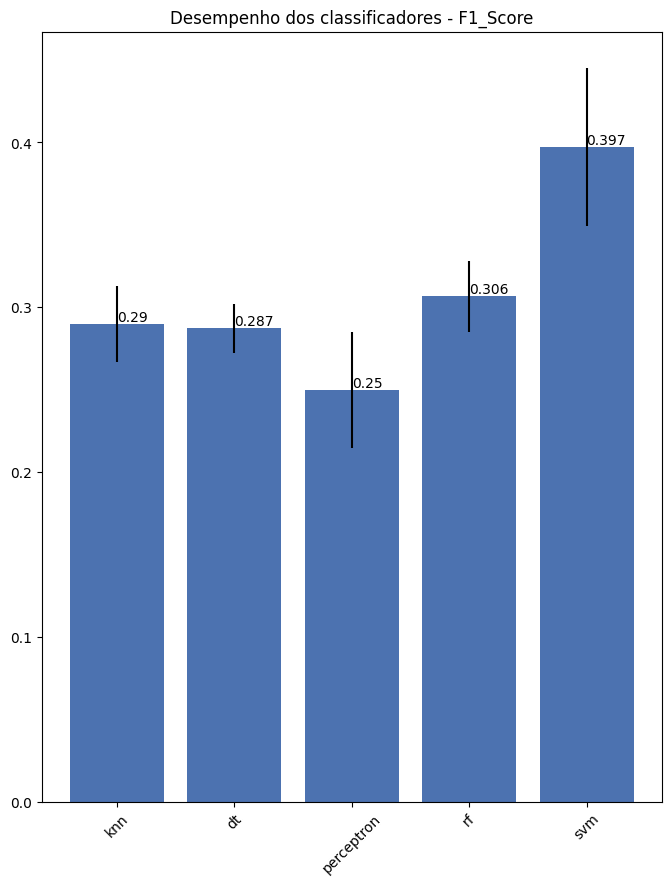

In [ ]:
import pandas as pd

# Definir as colunas a serem utilizadas
dados_sem_had_heart_attack = dados_encoded_reduzido.drop(columns=['HadHeartAttack'])
columns_to_use = dados_sem_had_heart_attack.columns.tolist()
#print(columns_to_use)
# Obter os índices numéricos das colunas
column_indices = [dados_encoded_reduzido.columns.get_loc(col) for col in columns_to_use]

# Chamar a função classificacao para KNN
results = classificacao(dados_encoded_reduzido, columns=column_indices, target=dados_encoded_reduzido['HadHeartAttack'],
                            preproc_fn=preprocess, score_fn=f1_score, score_name="F1_Score",
                            folds=5, plot=True)

# Experimentos

####Melhores Hiperparâmetros e Features Selecionadas



In [ ]:
import pandas as pd

# Melhores hiperparâmetros dos classificadores
best_params = {
    'KNN': {'n_neighbors': 5},
    'Decision Tree': {'criterion': 'entropy', 'splitter': 'best', 'min_samples_split': 2},
    'Perceptron': {'eta0': 0.1, 'max_iter': 1000},
    # Adicionar outros classificadores aqui, se necessário
}

# Features selecionadas
selected_features = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth']

# Criar dataframe com os melhores hiperparâmetros e features selecionadas
df_hyperparams = pd.DataFrame.from_dict(best_params, orient='index')
df_hyperparams['Selected Features'] = ', '.join(selected_features)

# Mostrar a tabela
print("Melhores Hiperparâmetros e Features Selecionadas:")
print(df_hyperparams)


Melhores Hiperparâmetros e Features Selecionadas:
               n_neighbors criterion splitter  min_samples_split  eta0  \
KNN                    5.0       NaN      NaN                NaN   NaN   
Decision Tree          NaN   entropy     best                2.0   NaN   
Perceptron             NaN       NaN      NaN                NaN   0.1   

               max_iter                                  Selected Features  
KNN                 NaN  BMI, Smoking, AlcoholDrinking, Stroke, Physica...  
Decision Tree       NaN  BMI, Smoking, AlcoholDrinking, Stroke, Physica...  
Perceptron       1000.0  BMI, Smoking, AlcoholDrinking, Stroke, Physica...  


####Desempenho dos Classificadores

In [ ]:
# Desempenho dos classificadores
import pandas as pd
classifiers_performance = {
    'KNN': {'Accuracy': 0.892, 'Precision': 0.228, 'Recall': 0.39, 'F1-score': 0.285},
    'Decision Tree': {'Accuracy': 0.802, 'Precision': 0.18, 'Recall': 0.714, 'F1-score': 0.287},
    'Perceptron': {'Accuracy': 0.738, 'Precision': 0.148, 'Recall': 0.778, 'F1-score': 0.247},
    'Random Forest': {'Accuracy': 0.946, 'Precision': 0.526, 'Recall': 0.216, 'F1-score': 0.306},
    'SVM': {'Accuracy': 0.935, 'Precision': 0.426, 'Recall': 0.492, 'F1-score': 0.455}
}

# Criar dataframe com o desempenho dos classificadores
df_performance = pd.DataFrame.from_dict(classifiers_performance, orient='index')

# Mostrar a tabela
print("\nDesempenho dos Classificadores:")
print(df_performance)



Desempenho dos Classificadores:
               Accuracy  Precision  Recall  F1-score
KNN               0.892      0.228   0.390     0.285
Decision Tree     0.802      0.180   0.714     0.287
Perceptron        0.738      0.148   0.778     0.247
Random Forest     0.946      0.526   0.216     0.306
SVM               0.935      0.426   0.492     0.455


# ATENÇÃO!!!!! Outra opção para treinar e visualizar os cinco modelos de classificação mencionados (Árvore de Decisão, Random Forest, SVM, Perceptron e k-NN)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para pré-processamento de dados
def preprocess(x_treino, x_teste, y_treino, y_teste):
    # Coloque aqui o código para pré-processamento dos dados

# Função para treinar e visualizar o modelo de Árvore de Decisão
def treino_e_visualizacao_arvore_decisao(X_treino, X_teste, y_treino, y_teste):
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2)
    dt.fit(X_treino, y_treino)
    y_pred = dt.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    print("Acurácia da Árvore de Decisão:", acc)
    plt.figure(figsize=(15, 10))
    plot_tree(dt, filled=True, feature_names=X_treino.columns, class_names=['No Disease', 'Disease'])
    plt.savefig('decision_tree.png')
    plt.show()

# Função para treinar e visualizar o modelo de Random Forest
def treino_e_visualizacao_random_forest(X_treino, X_teste, y_treino, y_teste):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_treino, y_treino)
    y_pred = rf.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    print("Acurácia da Random Forest:", acc)
    # Visualizar uma das árvores da Random Forest
    plt.figure(figsize=(15, 10))
    plot_tree(rf.estimators_[0], filled=True, feature_names=X_treino.columns, class_names=['No Disease', 'Disease'])
    plt.savefig('random_forest_tree.png')
    plt.show()

# Função para treinar o modelo SVM
def treino_e_teste_svm(X_treino, X_teste, y_treino, y_teste):
    svm = SVC(kernel='linear')
    svm.fit(X_treino, y_treino)
    y_pred = svm.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    print("Acurácia do SVM:", acc)

# Função para treinar o modelo Perceptron
def treino_e_teste_perceptron(X_treino, X_teste, y_treino, y_teste):
    perceptron = Perceptron()
    perceptron.fit(X_treino, y_treino)
    y_pred = perceptron.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    print("Acurácia do Perceptron:", acc)

# Função para treinar o modelo k-NN
def treino_e_teste_knn(X_treino, X_teste, y_treino, y_teste):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_treino, y_treino)
    y_pred = knn.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    print("Acurácia do k-NN:", acc)

# Treinamento e teste dos modelos
treino_e_visualizacao_arvore_decisao(X_treino, X_teste, y_treino, y_teste)
treino_e_visualizacao_random_forest(X_treino, X_teste, y_treino, y_teste)
treino_e_teste_svm(X_treino, X_teste, y_treino, y_teste)
treino_e_teste_perceptron(X_treino, X_teste, y_treino, y_teste)
treino_e_teste_knn(X_treino, X_teste, y_treino, y_teste)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

preprocess(x_treino, x_teste, y_treino, y_teste)

# Função para treinar e visualizar o modelo de Árvore de Decisão
def train_and_visualize_decision_tree(X_train, y_train):
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2)
    dt.fit(X_train, y_train)
    plt.figure(figsize=(15, 10))
    plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['No Disease', 'Disease'])
    plt.savefig('decision_tree.png')
    plt.show()

# Função para treinar e visualizar o modelo de Random Forest
def train_and_visualize_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    # Visualizar uma das árvores da Random Forest
    plt.figure(figsize=(15, 10))
    plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Disease', 'Disease'])
    plt.savefig('random_forest_tree.png')
    plt.show()

# Função para treinar e visualizar o modelo SVM
def train_svm(X_train, y_train):
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    # Visualizar os vetores de suporte (opcional)
    # plot_support_vectors(svm, X_train, y_train)

# Função para treinar o modelo Perceptron
def train_perceptron(X_train, y_train):
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)

# Função para treinar o modelo k-NN
def train_knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

# Treinamento e visualização dos modelos
train_and_visualize_decision_tree(X_train, y_train)
train_and_visualize_random_forest(X_train, y_train)
train_svm(X_train, y_train)
train_perceptron(X_train, y_train)
train_knn(X_train, y_train)
